Not all data is linear. Topological data analysis (TDA) provides tools and a paradigm for dealing with data whose structure may best be revealed by looking at its **shape**, and in particular, what kinds of holes and branches it might have.  
The old joke is that a topologist can't tell a coffee mug from a donut -- they each have one hole. But a topologist can, using TDA, differentiate an SUV from a compact car given LIDAR data!  

## Overview of the process

Take your data and prepare it if necessary.

Decide on a distance metric or a way to embed the data into $\mathbb{R}^n$. 

Decide on an algorithm for slicing up the data (a filtration).

SLice it, playing with parameters, and build a graph from the chunks of data that occur together. 

Analyze the topology of the graph.

Play with parameters again, or wtih a different filtration.

## Let's do it.

Here's a set of points. (This code is all modified from the TDAmapper documentation.} If you remember your trig you might guess the shape!

In [2]:
# packages we need
library(ggplot2) 
library(TDA)
library(TDAmapper)
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [9]:
# Create a Lissajous figure for example purposes
lissajous <- jitter(cbind(2*cos(0.333*(1:200)),sin(1:200)),3)
#plot(lissajous[,1],lissajous[,2])
# Uncomment the plot line above if you want to see a plot of this original data

This is a set of points $(x,y)$, so we are in a very nice situation. First, no dimension reduction techniques are needed to simplify the data. Second, I don't have to think about what distance metric I want to use. We can just use the definition of "distance" that you learned in junior high (Euclidean distance).

So let's go to the filtration part. First, we'll just project onto the x-coordinate (so just forget the y-coordinate) for our filtration. Let's check it out:

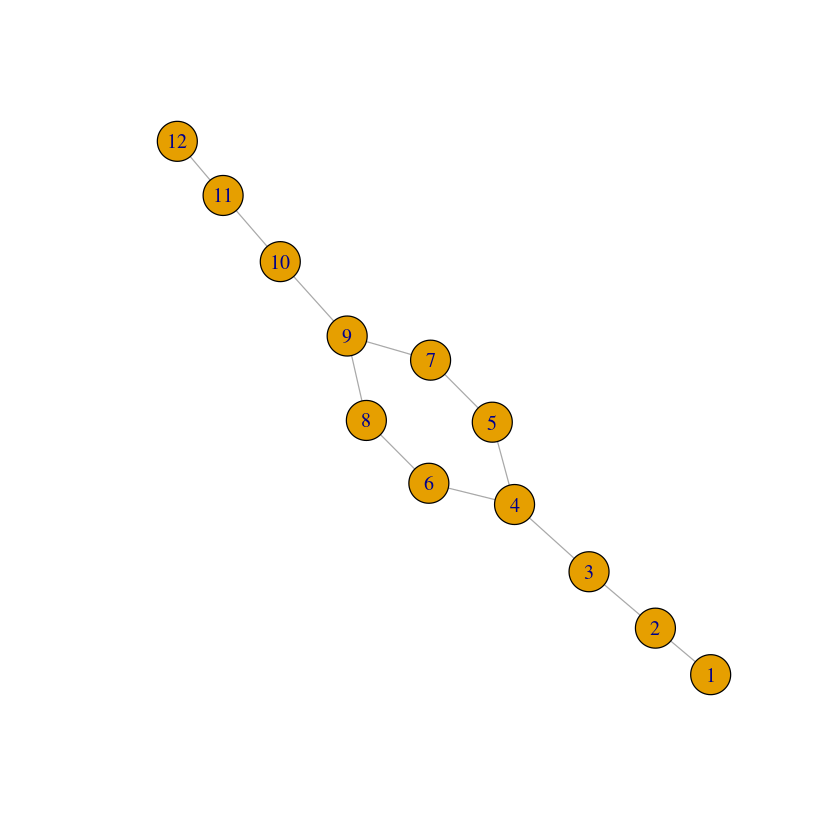

In [6]:
# Create a filter that we want to use: slice vertically/project to x-coordinate
filter <- lissajous[,1] #projecting to x-coordinate as our filtration function
# Use mapper1D from TDAmapper. Create a distance matrix using dist, 
# use the filter we created above,
# use default values for number of intervals, percent overlap of the intervals, and 
# bins for clustering within intervals
m1 <- mapper1D(
     distance_matrix = dist(lissajous),
     filter_values = filter,
     num_intervals = 10,
     percent_overlap = 50,
     num_bins_when_clustering = 10)
# Use igraph methods to create a graph object from the mapper output
g1 <- graph.adjacency(m1$adjacency, mode="undirected")
# Plot the graph
plot(g1, layout = layout.auto(g1) )

We don't see the full structure of the shape (I know this, because I know the original shape) but you can definitely see that there's a circle in the middle. Maybe our number of intervals is too small -- only 10 intervals that we're slicing this into. Increase to 20:

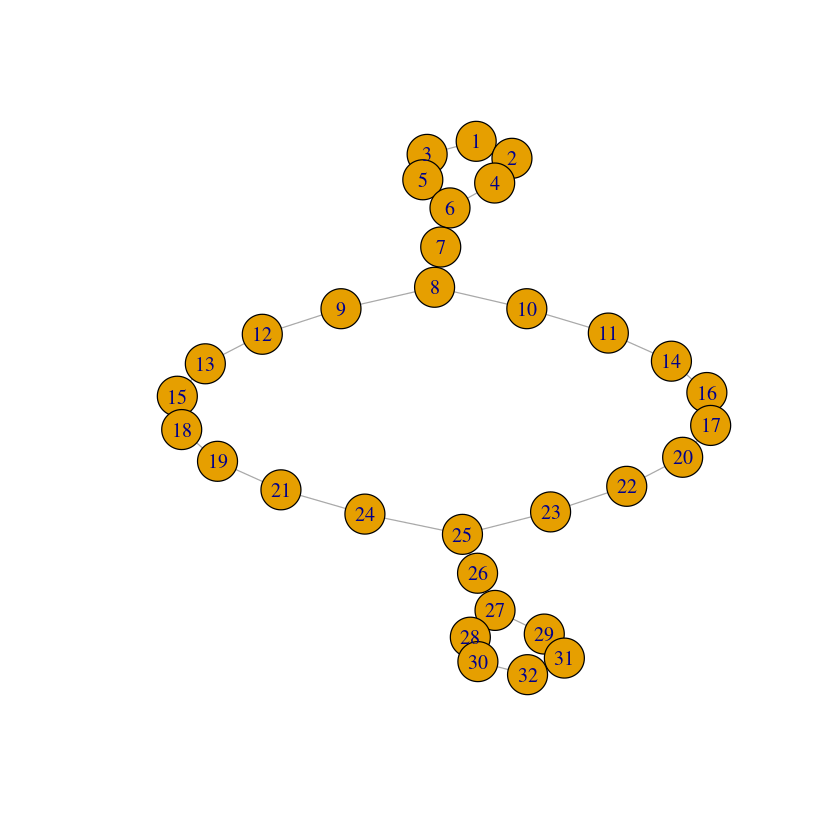

In [7]:
# I'm just increasing number of intervals
m2 <- mapper1D(
     distance_matrix = dist(lissajous),
     filter_values = filter,
     num_intervals = 20,
     percent_overlap = 50,
     num_bins_when_clustering = 10)
g2 <- graph.adjacency(m2$adjacency, mode="undirected")
plot(g2, layout = layout.auto(g2) )

You can clearly see three loops here! That actually matches with the original data.

Play with the other parameters: if you go too low on percent_overlap (the overlap of the filtration intervals) the graph will fall apart, and if you go too high it'll all blur into one blob or lose details like the small loops on the end.

Try filtering by projecting to the y-axis: 

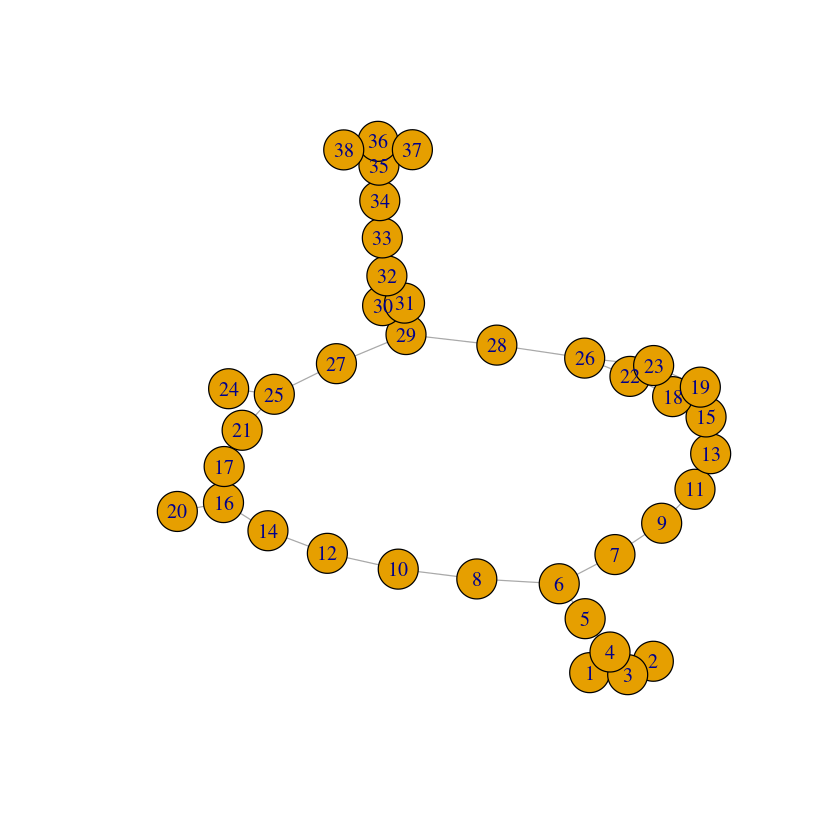

In [10]:
# Project to y-coordinate as filtration
filtery <- lissajous[,2] #projecting to y-coordinate as our filtration function
m3 <- mapper1D(
     distance_matrix = dist(lissajous),
     filter_values = filtery,
     num_intervals = 20,
     percent_overlap = 50,
     num_bins_when_clustering = 10)
g3 <- graph.adjacency(m3$adjacency, mode="undirected")
plot(g3, layout = layout.auto(g3) )

We can also look at the barcode to give us a "signature" for the data. For this, we use the TDA package and we use a Rips diagram rather than the grid diagram (because I explained the Rips complex in our Day of Data discussion!).

# Generated complex of size: 344915 
# Persistence timer: Elapsed time [ 0.000000 ] seconds


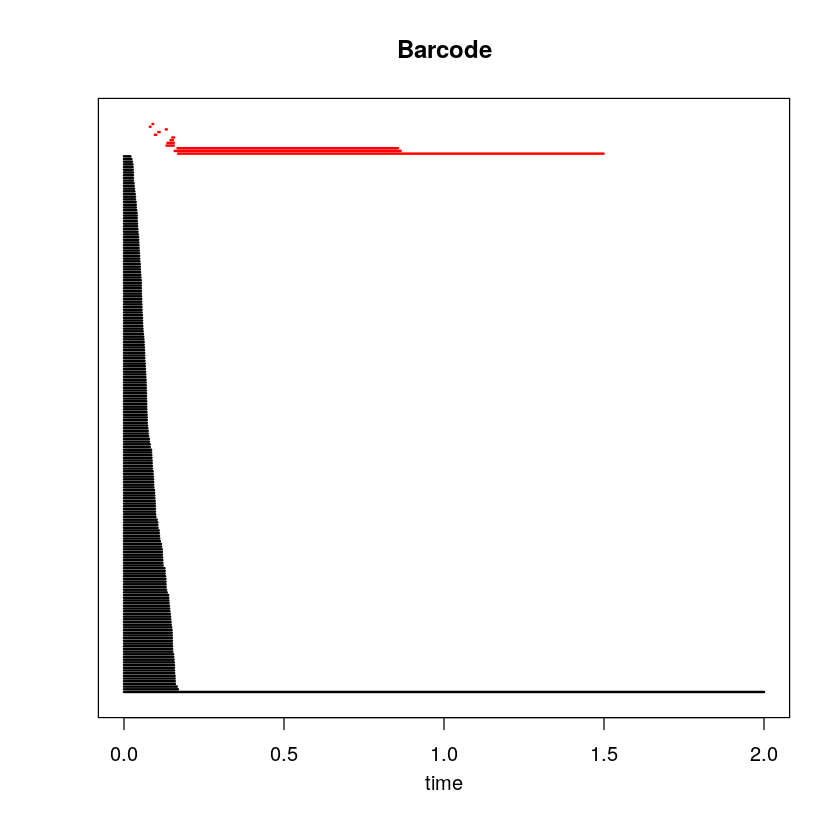

In [14]:
maxdimension <- 1
maxscale <- 2
DiagRips <- ripsDiag(X = lissajous, maxdimension, maxscale, location = TRUE, printProgress = TRUE)
plot(DiagRips[["diagram"]], barcode = TRUE, main = "Barcode")

You can see in black that there are lots of points (every black bar corresponds to a point to start with), but none of the points or connected components stand out as *persisting* as we grow the balls around them and construct the graph (Rips complex). There are also three red bars at the top, the three holes or loops in the original data. Notice that in the original data we have two small holes and one big one in the middle -- the red bars correspond to two small holes (that end when the hole gets filled up) and one big one!


From the above example you might be getting an idea on how to use TDA on data that already has some spatial arrangement. Try these two exercises.

## Exercises for spatial data

Below is some data that you can use to try this yourself. Tips: up to you whether to try "mapper" or barcodes first to get some idea. However, you may want to look at the min and max for your x and y coordinates to see how to adjust the scale.

In [15]:
# This code is from http://homepage.divms.uiowa.edu/~idarcy/COURSES/TDA/LABS/data.r
t <- runif(100, min=1, max=6.3) # theta
X <- data.frame( x = c( t*cos(t), -t*cos(t) ), y = c( t*sin(t), -t*sin(t) ) )
# The next line is commented out because you don't want to see the answer yet!
# plot(X[,1], X[,2]) 

In [16]:
# Use this space to run mapper or barcode code to see if you can identify the topology of this data


In [17]:
# Use this space to run mapper or barcode code to see if you can identify the topology of this data



## Fake data is great but who cares?

A grumpy way of putting it, but many of you might say, I don't have spatial data like this. I have time series, or a database of recipes and their ingredients, or...

So let's look at some stock data. This is looking at some "shape" of the stock market, looking at what happens in times of crisis versus times of plenty.


In [ ]:
# Here is how to get your own stock data and set it up in the right form for us. 
# It downloads the information for you, so today for Day of Data I've tried to provide a
# ready-made csv of the data I want.

#library(BatchGetSymbols)
#library(reshape2)
#first.date <- as.Date('2004/01/01')
#last.date <- as.Date('2009/09/30')
#tickers <- c('MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UNH','UTX','VZ','WMT','DIS')
#data <- BatchGetSymbols(tickers = tickers,
#                        first.date = first.date,
#                        last.date = last.date)
#newdata <- BatchGetSymbols(tickers = tickers,
#            first.date = as.Date('2017/05/01'),
#           last.date = as.Date('2017/10/01'))
#widestock <- dcast(data$df.tickers[,6:8], ref.date ~ ticker, value.var="price.adjusted")
#logrets <- apply(widestock[,2:30], 2, 
#                function(x) diff(log(x), lag=1))

In [18]:
logrets <- read.csv("logrets.csv")

Warning message in file(file, "rt"):
“cannot open file 'logrets.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [19]:
first100cor <- cor(logrets[1:100,], method = "pearson")
then200cor <- cor(logrets[101:200,], method = "pearson")
then1000cor <- cor(logrets[1001:1100,], method = "pearson")
then1200cor <- cor(logrets[1201:1300,], method = "pearson")

ERROR: Error in is.data.frame(x): object 'logrets' not found
